# Unit Circle
Points on a circle are described in polar coordinates by distance from the center, $r$, and angle from an axis, $\theta$.

# Naïve approach: Independently sampling $r$ and $\theta$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_circle(r, theta):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.scatter(theta, r)
    # Move radial labels away from plotted line for visibility
    ax.set_rlabel_position(-22.5)

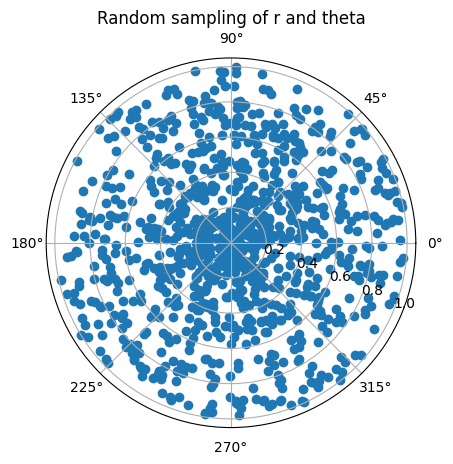

In [2]:
num_random_samples = 1000

r = [random.random() for _ in range(num_random_samples)]
theta = [random.random() * 2 * np.pi for _ in range(num_random_samples)]

plot_circle(r, theta)
plt.title("Random sampling of r and theta")
plt.show()

Notice that, when r and $\theta$ are sampled independently, the points are concentrated in the center. This occurs because the amount of area described by $\delta r\delta\theta$ does not vary uniformly: it increases with increasing $r$. When $r$ is small, all the randomly chosen points are distributed over a small area; when $r$ is larger, the randomly-chosen points are spread out over a larger area.

For example, the area of the unit sphere described by the first $\frac{1}{3}$ of the radius, the region where $0 \le r \lt \frac{1}{3}$, is $A_{\frac{1}{3}} = \pi (\frac{1}{3})^2 = 0.349$.

The area described by the next $\frac{1}{3}$ of the radius, where $\frac{1}{3} \le r \lt \frac{2}{3}$, is  $A_{\frac{2}{3}} -  A_{\frac{1}{3}} = \pi(\frac{2}{3})^2 - \pi (\frac{1}{3})^2 = 1.047$.

The final third of the radius makes up 1.745 square units of area.

In other words, the innermost third of the radius accounts for $0.349 / 3.14159 = 0.111$, or 11.1%, of the total area of the unit sphere.

The second third of the radius accounts for $1.047 / 3.14159 = 0.333$, or 33.3%, of the total area of the unit sphere.

The outermost third of the radius accounts for $1.745 / 3.14159 = 0.555$, or 55.5%, of the total area of the unit sphere.

By randomly sampling the radius and the angle separately, we distribute the *same number* of points in each of these thirds, causing them to be concentrated in the small area nearest the center and distributing them over a comparatively wider area toward the outside of the circle.

In [3]:
def print_area_of_circle(radius):
    print(f"Area of circle with radius {radius} = {np.pi * radius * radius}")

def print_diff_in_area_of_circle(r1, r2):
    print(f"Difference in area between circle with radius {r2} and circle with radius {r1} = {np.pi * (r2*r2 - r1*r1)}")

print_area_of_circle(1/3)
print_area_of_circle(2/3)
print_area_of_circle(1)

print("\n")
print_diff_in_area_of_circle(1/3, 2/3)
print_diff_in_area_of_circle(2/3, 1)

Area of circle with radius 0.3333333333333333 = 0.34906585039886584
Area of circle with radius 0.6666666666666666 = 1.3962634015954634
Area of circle with radius 1 = 3.141592653589793


Difference in area between circle with radius 0.6666666666666666 and circle with radius 0.3333333333333333 = 1.0471975511965976
Difference in area between circle with radius 1 and circle with radius 0.6666666666666666 = 1.7453292519943295


## Achieving uniform sampling over the area

Because the area increases quadratically in $r$, we can achieve uniform random points by sampling from the square root of $r$. 

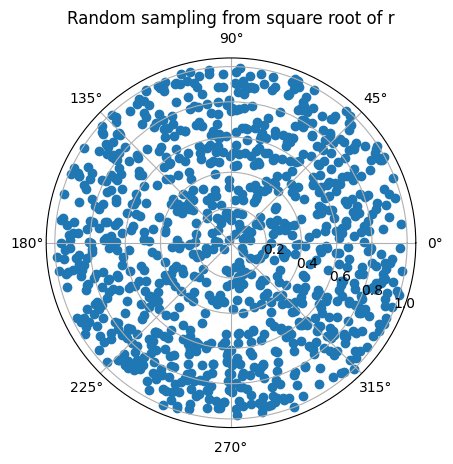

In [4]:
num_random_samples = 1000

r = [np.sqrt(random.random()) for _ in range(num_random_samples)]
theta = [random.random() * 2 * np.pi for _ in range(num_random_samples)]

plot_circle(r, theta)
plt.title("Random sampling from square root of r")
plt.show()

In other words, the cumulative distribution function for the area of the unit circle is given by:

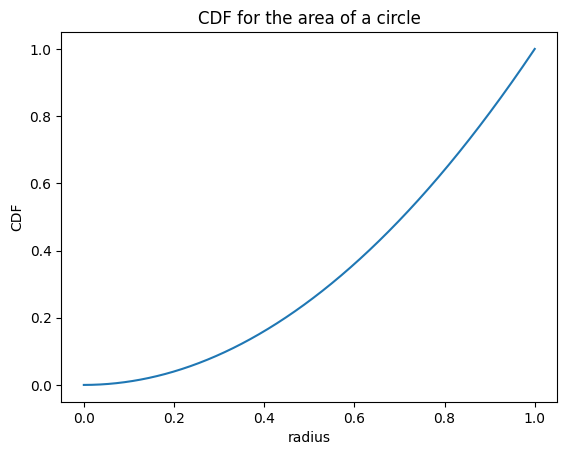

In [5]:
radius = np.linspace(0, 1, 1000)
cdf = radius * radius

plt.plot(radius, cdf)
plt.title('CDF for the area of a circle')
plt.xlabel('radius')
plt.ylabel('CDF')
plt.show()

We have shown that we can generate a uniform random sample of points within the circle by **sampling from the inverse CDF** of the area.

# Unit Sphere

Points on a unit sphere ($r=1$) are defined by $\theta$, the angle in the xy plane from the positive x-axis, and $\phi$, the angle from the positive z-axis.

## Naïve approach: Independently sampling each angle

As with the circle, randomly sampling over $\theta$ and $\phi$ independently does not give a uniform distribution of points over the unit sphere. Points are more concentrated at the poles and less concentrated around the equator.

In [6]:
def polar_to_cartesian(theta, phi):
    # theta is the angle in the xy plane from the positive x-axis
    # phi is the angle from the positive z-axis
    x = np.cos(theta) * np.sin(phi)
    y = np.sin(theta) * np.sin(phi)
    z = np.cos(phi)
    return (x, y, z)

def plot_sphere(x, y, z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    
    # adjust the z-axis label position so it is visible
    ax.zaxis.labelpad = -0.1
    # correct the aspect ratio of the box so the sphere does not look flattened
    ax.set_box_aspect([np.ptp(x), np.ptp(y), np.ptp(z)])

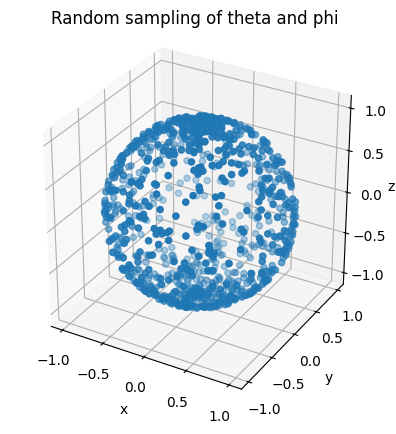

In [7]:
num_random_samples = 1000
theta = [random.random() * 2 * np.pi for _ in range(num_random_samples)]
phi = [random.random() * np.pi for _ in range(num_random_samples)]

x, y, z = polar_to_cartesian(theta, phi)
plot_sphere(x, y, z)
plt.title("Random sampling of theta and phi")
plt.show()

Similar to the case of the circle, this occurs because the amount of area described by $\delta\theta\delta\phi$ does not vary uniformly, but increases with increasing $\phi$.

## Achieving uniform sampling over the sphere

The area element on the surface of the sphere is not uniform in $\phi$. Instead of sampling from $\phi$ directly, we can sample from the inverse of the cumulative distribution function of the area as it depends on $\phi$.

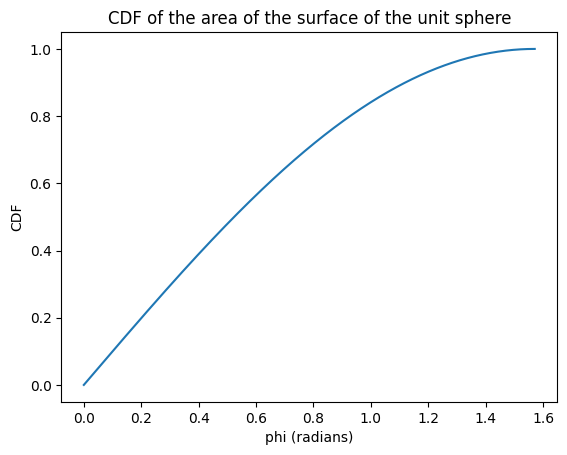

In [8]:
phi = np.linspace(0, np.pi / 2, 1000)
cdf = np.cos(np.pi / 2 - phi)

plt.plot(phi, cdf)
plt.title('CDF of the area of the surface of the unit sphere')
plt.xlabel('phi (radians)')
plt.ylabel('CDF')
plt.show()

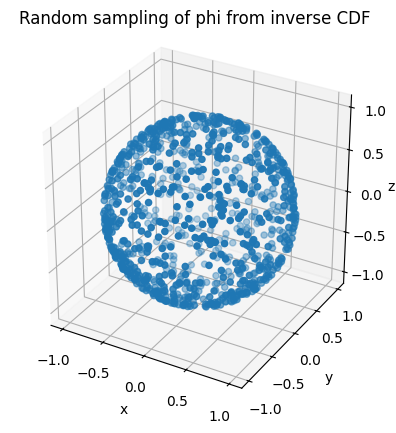

In [9]:
num_random_samples = 1000
theta = [random.random() * 2 * np.pi for _ in range(num_random_samples)]
phi_inverse_cdf = [np.acos(1 - 2 * random.random()) for _ in range(num_random_samples)]

x, y, z = polar_to_cartesian(theta, phi_inverse_cdf)
plot_sphere(x, y, z)
plt.title("Random sampling of phi from inverse CDF")
plt.show()